# Advanced Regression Assignment

In [1]:
# importing all the needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')



## 1. Data Understanding

In [2]:
# reading the csv file
houses = pd.read_csv("train.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#checking the the shape
houses.shape

(1460, 81)

In [4]:
#checking all column types and null count
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2. Data Cleaning

In [5]:
# checking null values
houses.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# too many columns. Getting only non zero null counts
houses.isna().sum()[houses.isna().sum().apply(lambda x: x>0)]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
# Getting percentage of nulls 
round(houses.isna().sum()[houses.isna().sum().apply(lambda x: x>0)]*100/1460, 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [8]:
# checking column Alley which has mostly NA
houses.Alley.value_counts(dropna = False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

As per data dictionary, the NA is not actually a missing value. It means the property has no Alley access. There are other columns also like this.

In [9]:
# For columns- 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature',  NA means that facility is not available in the house.
# Filling these Na with new value 'NO'
houses[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']] = houses[['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']].fillna('NO')

In [10]:
#checking value count again
houses.Alley.value_counts(dropna = False)

NO      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [11]:
# Getting percentage of nulls again
round(houses.isna().sum()[houses.isna().sum().apply(lambda x: x>0)]*100/1460, 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [12]:
# getting LotFrontage median value.
houses.LotFrontage.median()

69.0

In [13]:
# Since it has a good amount of records, we will not remove the data.
# Filling null in LotFrontage with the median value of the column
houses['LotFrontage'].fillna(69.0, inplace=True)

In [14]:
# Getting percentage of nulls again
round(houses.isna().sum()[houses.isna().sum().apply(lambda x: x>0)]*100/1460, 2)

MasVnrType      0.55
MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

In [15]:
# checking MasVnrType column
houses['MasVnrType'].value_counts(dropna=False)

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

In [16]:
# these 2 columns are related and have same null count. checking both together
houses[houses['MasVnrType'].isnull()][['MasVnrType', 'MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


MasVnrType and MasVnrArea are null for the same records. </br>
Since the count of records are low. We will delete these rows.

In [17]:
# Removing the null rows for the 2 columns
houses = houses.dropna(subset = ['MasVnrType', 'MasVnrArea'])

In [18]:
# Getting percentage of nulls again
round(houses.isna().sum()[houses.isna().sum().apply(lambda x: x>0)]*100/1460, 2)

BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

In [19]:
#checking basement columns
houses['BsmtQual'].value_counts(dropna=False)

TA     648
Gd     612
Ex     120
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

In [20]:
# checking all related basement columns
houses[houses['BsmtQual'].isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].head(10)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


As per data dictionary, NA for Basement related columns means the house has no basement, which is a valid scenario. And all the columns are Na for the same records. Hence, we will not remove the rows. Will fill NA with a new category 'NB' for 'No Basement'

In [21]:
# Filling nulls with 'NB' for basement columns
houses[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = houses[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NB')

In [22]:
# checking value count
houses['BsmtQual'].value_counts(dropna=False)

TA    648
Gd    612
Ex    120
NB     37
Fa     35
Name: BsmtQual, dtype: int64

In [23]:
# Getting percentage of nulls again
round(houses.isna().sum()[houses.isna().sum().apply(lambda x: x>0)]*100/1460, 2)

Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

In [24]:
# checking Garage related columns
houses['GarageType'].value_counts(dropna= False)

Attchd     863
Detchd     387
BuiltIn     87
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [25]:
# Columns 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' have NA, which means there is no Garage which is a valid scenario.
# Filling this with new value 'NG', for 'No Garage'
houses[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] = houses[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NG')

In [26]:
# checking values for the year garage was built. 
houses['GarageYrBlt'].describe()

count    1371.000000
mean     1978.374179
std        24.688912
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [27]:
# Filling NA for GarageYrBlt with lowest value
houses['GarageYrBlt'] =  houses['GarageYrBlt'].fillna(1900)

In [28]:
# Getting percentage of nulls again
round(houses.isna().sum()[houses.isna().sum().apply(lambda x: x>0)]*100/1460, 2)

Electrical    0.07
dtype: float64

In [29]:
# checking column 'Electrical'
houses[houses['Electrical'].isnull()][['Electrical']]

,Electrical
1379,NaN


In [30]:
# Removing the row. It is the only row left with null value.
houses = houses.dropna()

In [31]:
# Getting percentage of nulls again. Shoulb be none
round(houses.isna().sum()[houses.isna().sum().apply(lambda x: x>0)]*100/1460, 2)

Series([], dtype: float64)

In [32]:
# Updaged dimensions of the data
houses.shape

(1451, 81)

In [33]:
# check duplicates
houses[houses.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


## 3. Data Exploration

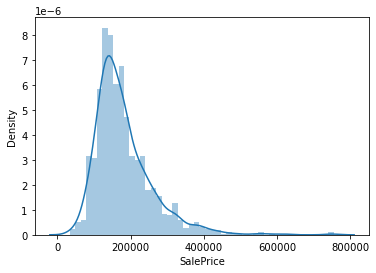

In [34]:
# checking few of the important variables
# distribution of target variable
sns.distplot(houses['SalePrice'])
plt.show()


Prices go up to about 800K with most houses priced below 200K

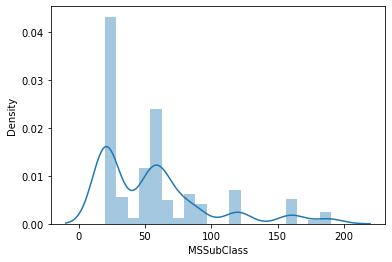

In [35]:
# checking class of property
sns.distplot(houses['MSSubClass'])
plt.show()

Most houses are in class 20 and then 60

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

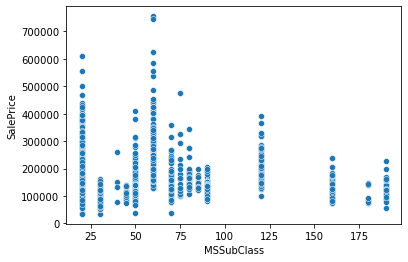

In [36]:
#checking Class against price
sns.scatterplot(data=houses, x="MSSubClass", y="SalePrice")

Sale Price is highest in class 60

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

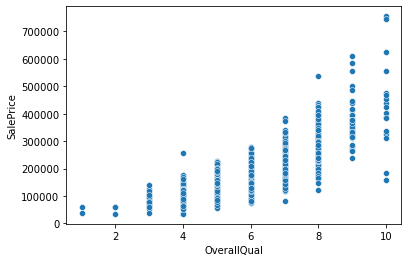

In [37]:
#checking Overall Quality against price
sns.scatterplot(data=houses, x="OverallQual", y="SalePrice")

As expected, higher the quality, higher the price. Could be a good predictor

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

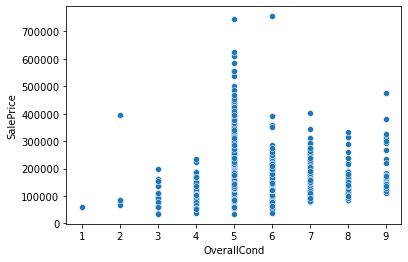

In [38]:
#checking Overall Condition against price
sns.scatterplot(data=houses, x="OverallCond", y="SalePrice")

Highly priced houses are of condition rating 5 and 6, but a general trend is upward as condition rating is high

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

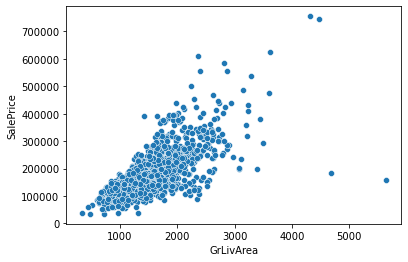

In [39]:
#checking Living Area against price
sns.scatterplot(data=houses, x="GrLivArea", y="SalePrice")

Price increases with more Living Area. Could be another good predictor

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

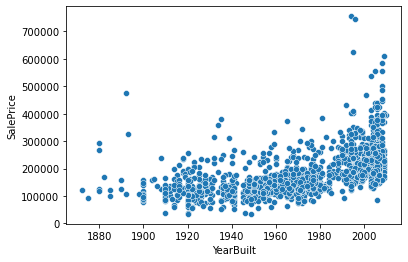

In [40]:
#checking Year Built against price
sns.scatterplot(data=houses, x="YearBuilt", y="SalePrice")

Newer homes get better price

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

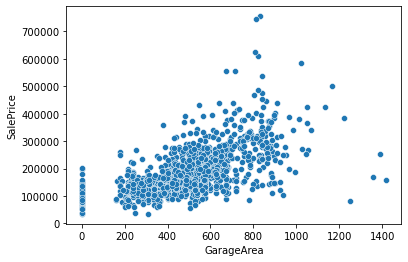

In [41]:
#checking Garage Area against price
sns.scatterplot(data=houses, x="GarageArea", y="SalePrice")

Highly priced houses are of Garage area 800 SQFT, but a general trend is upward

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

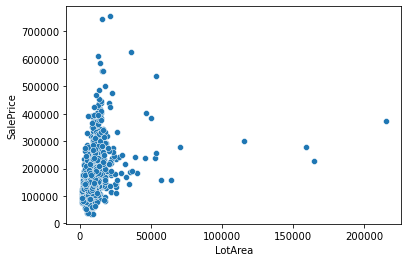

In [42]:
#checking Lot Area against price
sns.scatterplot(data=houses, x="LotArea", y="SalePrice")

Higher values Lot area does not seem to make difference in pricing

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [43]:
# getting all numeric (float and int) variables in the dataset to see relationship
houses_numeric = houses.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [44]:
# correlation matrix
cor = houses_numeric.corr()
cor

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011119,-0.011593,-0.032789,-0.032075,0.013595,-0.016378,-0.025398,-0.049736,-0.006218,...,-0.028217,-0.005435,0.004939,-0.046455,0.002058,0.057388,-0.006025,0.019499,0.002630,-0.025188
MSSubClass,0.011119,1.000000,-0.355068,-0.138039,0.034799,-0.061147,0.027979,0.040664,0.023156,-0.069241,...,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.021583,-0.082760
LotFrontage,-0.011593,-0.355068,1.000000,0.304694,0.233277,-0.053026,0.116365,0.082885,0.179537,0.215778,...,0.074495,0.134766,0.010728,0.062188,0.037974,0.181300,-0.000184,0.009784,0.007310,0.333206
LotArea,-0.032789,-0.138039,0.304694,1.000000,0.106305,-0.002297,0.015708,0.015190,0.104141,0.213081,...,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,-0.012969,0.264668
OverallQual,-0.032075,0.034799,0.233277,0.106305,1.000000,-0.090940,0.572129,0.550499,0.411699,0.236421,...,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,-0.025116,0.790085
OverallCond,0.013595,-0.061147,-0.053026,-0.002297,-0.090940,1.000000,-0.376557,0.075545,-0.128333,-0.042292,...,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,-0.004210,0.043487,-0.076361
YearBuilt,-0.016378,0.027979,0.116365,0.015708,0.572129,-0.376557,1.000000,0.590324,0.316345,0.250209,...,0.226960,0.185758,-0.386748,0.032145,-0.048977,0.005368,-0.033994,0.009756,-0.014559,0.523274
YearRemodAdd,-0.025398,0.040664,0.082885,0.015190,0.550499,0.075545,0.590324,1.000000,0.180136,0.128422,...,0.207514,0.224140,-0.192185,0.046012,-0.037471,0.006198,-0.009866,0.018959,0.035263,0.507488
MasVnrArea,-0.049736,0.023156,0.179537,0.104141,0.411699,-0.128333,0.316345,0.180136,1.000000,0.264469,...,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,-0.008147,0.477486
BsmtFinSF1,-0.006218,-0.069241,0.215778,0.213081,0.236421,-0.042292,0.250209,0.128422,0.264469,1.000000,...,0.205447,0.107279,-0.105887,0.026926,0.063139,0.141361,0.003852,-0.016387,0.016969,0.383995


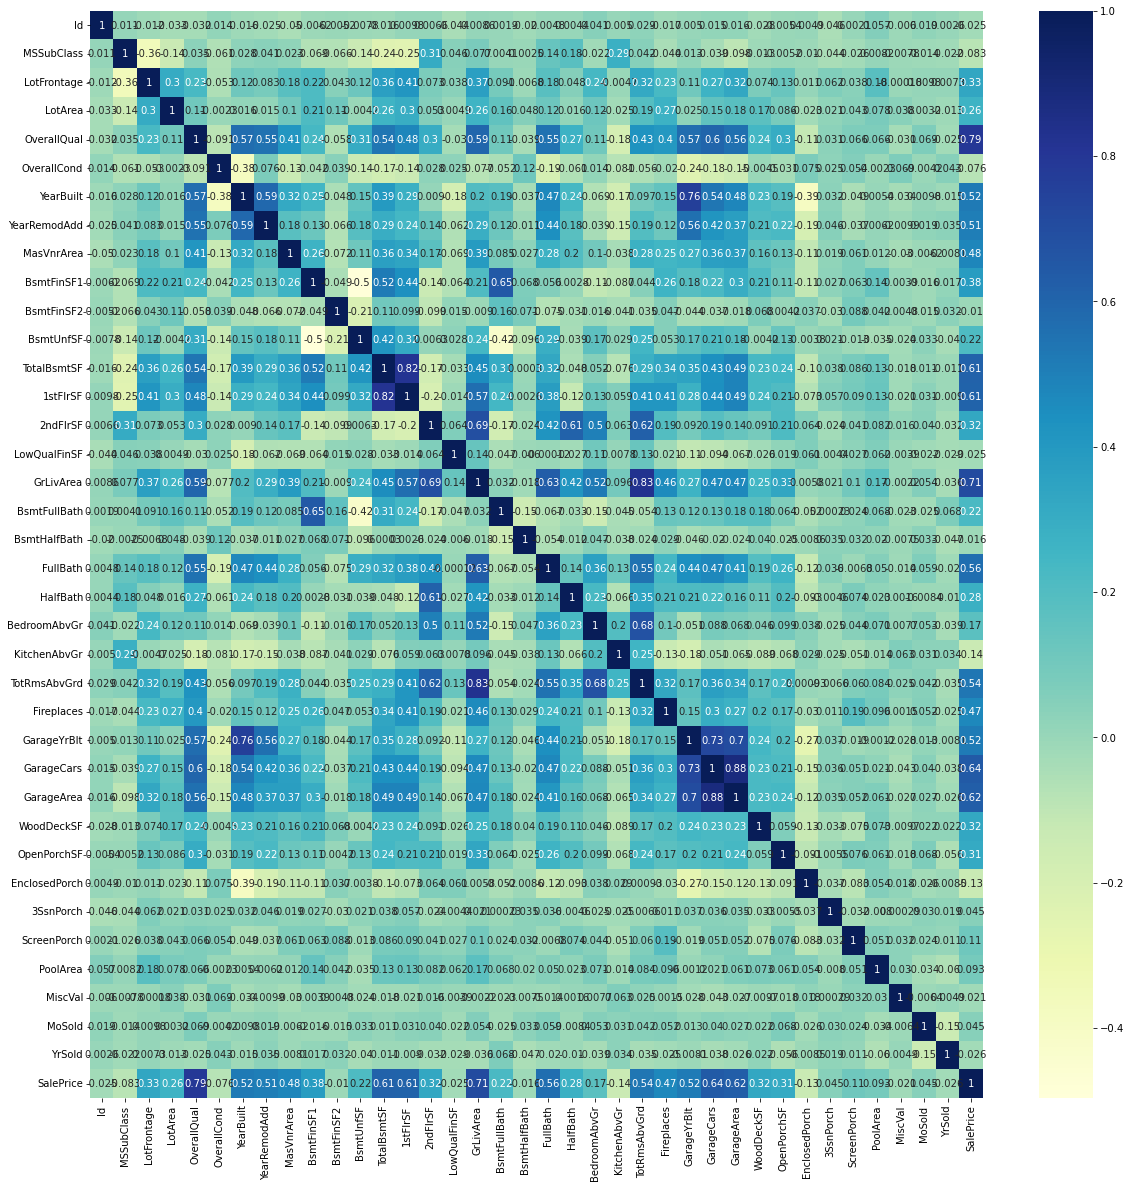

In [45]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()



Few insights from heatmap of correlations </br>
- SalePrice is highly positively correlated to OverallQual, TotalBasementSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea</br>
- SalePrice is negatively correlated with KitchenAbvGr, EnclosedPorch</br>
- Few independent variables are highly correlated to each other </br>
 -> GarageYrBuilt, YrBuilt, GarageCars, GarageArea</br>
 -> TotalRmsAbvGrd, BedroomAbvGr
 

In [46]:
#checking outliers for numberic variables
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,69.845624,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,...,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,22.044429,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,...,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Even though there are some statistical outliers, the values seem valid. So, we will not remove any data.

In [47]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallC

In [48]:
# MSSubClass is a nominal variable, even though its data type is numeric. 
# Other numeric categorical variables are ordinal and can be scaled.
# MSSubClass is not in any order. So, converting it to object data type.
houses['MSSubClass'] = houses['MSSubClass'].astype('object')
houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   object 
 2   MSZoning       1451 non-null   object 
 3   LotFrontage    1451 non-null   float64
 4   LotArea        1451 non-null   int64  
 5   Street         1451 non-null   object 
 6   Alley          1451 non-null   object 
 7   LotShape       1451 non-null   object 
 8   LandContour    1451 non-null   object 
 9   Utilities      1451 non-null   object 
 10  LotConfig      1451 non-null   object 
 11  LandSlope      1451 non-null   object 
 12  Neighborhood   1451 non-null   object 
 13  Condition1     1451 non-null   object 
 14  Condition2     1451 non-null   object 
 15  BldgType       1451 non-null   object 
 16  HouseStyle     1451 non-null   object 
 17  OverallQual    1451 non-null   int64  
 18  OverallC

## 4. Data Preparation 


In [49]:
# Creating X and Y data sets
# Id is a unique value and SalePrice is the target variable, which are not needed in X
X = houses.drop(['Id', 'SalePrice'], axis = 1)

y = houses['SalePrice'] # response variable in Y
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NO,Reg,Lvl,AllPub,Inside,...,0,0,NO,NO,NO,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NO,Reg,Lvl,AllPub,FR2,...,0,0,NO,NO,NO,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NO,IR1,Lvl,AllPub,Inside,...,0,0,NO,NO,NO,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NO,IR1,Lvl,AllPub,Corner,...,0,0,NO,NO,NO,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NO,IR1,Lvl,AllPub,FR2,...,0,0,NO,NO,NO,0,12,2008,WD,Normal


In [50]:
# creating dummy variables for categorical variables

# taking all categorical variables
houses_categorical = X.select_dtypes(include=['object'])
houses_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NO,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NO,NO,NO,WD,Normal
1,20,RL,Pave,NO,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NO,NO,NO,WD,Normal
2,60,RL,Pave,NO,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NO,NO,NO,WD,Normal
3,70,RL,Pave,NO,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NO,NO,NO,WD,Abnorml
4,60,RL,Pave,NO,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NO,NO,NO,WD,Normal


In [51]:
# create dummies - one hot encoding
houses_dummies = pd.get_dummies(houses_categorical, drop_first=True)
houses_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [52]:
# Dropping the original categorical variables from X
X = X.drop(houses_categorical.columns, axis=1)
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,12,2008


In [53]:
# concatenate dummy variables with X
X = pd.concat([X, houses_dummies], axis=1)
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [54]:
# scaling the features with standard scale
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after scaling
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=272)

In [55]:
X.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,...,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03,1.451000e+03
mean,-2.828926e-16,-1.202375e-16,-2.068948e-16,9.082252e-17,1.686051e-15,-2.425811e-15,1.215048e-16,-2.241870e-17,6.794473e-17,-1.212752e-16,...,1.378511e-15,-1.711052e-17,-4.376620e-16,5.757417e-16,6.572582e-17,-5.551211e-16,-1.314134e-17,-2.695218e-17,1.828693e-17,-4.126418e-16
std,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,...,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00,1.000345e+00
min,-2.216545e+00,-9.217447e-01,-3.688460e+00,-4.114528e+00,-3.283393e+00,-1.683773e+00,-5.730967e-01,-9.715795e-01,-2.896215e-01,-1.283087e+00,...,-5.880319e-02,-5.880319e-02,-2.988969e-01,-4.551728e-02,-2.576207e+00,-5.257699e-02,-8.740074e-02,-1.182212e-01,-2.150356e+00,-3.029824e-01
25%,-4.467804e-01,-2.973418e-01,-7.919883e-01,-5.207401e-01,-5.663495e-01,-9.087371e-01,-5.730967e-01,-9.715795e-01,-2.896215e-01,-7.808886e-01,...,-5.880319e-02,-5.880319e-02,-2.988969e-01,-4.551728e-02,3.881676e-01,-5.257699e-02,-8.740074e-02,-1.182212e-01,4.650393e-01,-3.029824e-01
50%,-3.837320e-02,-1.031887e-01,-6.787046e-02,-5.207401e-01,3.007469e-02,3.991352e-01,-5.730967e-01,-1.346075e-01,-2.896215e-01,-1.995153e-01,...,-5.880319e-02,-5.880319e-02,-2.988969e-01,-4.551728e-02,3.881676e-01,-5.257699e-02,-8.740074e-02,-1.182212e-01,4.650393e-01,-3.029824e-01
75%,4.154126e-01,1.093335e-01,6.562474e-01,3.777069e-01,9.578457e-01,9.319721e-01,3.437987e-01,5.815418e-01,-2.896215e-01,5.447329e-01,...,-5.880319e-02,-5.880319e-02,-2.988969e-01,-4.551728e-02,3.881676e-01,-5.257699e-02,-8.740074e-02,-1.182212e-01,4.650393e-01,-3.029824e-01
max,1.103400e+01,2.049515e+01,2.828601e+00,3.073048e+00,1.289192e+00,1.222610e+00,8.264449e+00,1.142703e+01,8.824809e+00,4.001302e+00,...,1.700588e+01,1.700588e+01,3.345636e+00,2.196968e+01,3.881676e-01,1.901973e+01,1.144155e+01,8.458723e+00,4.650393e-01,3.300522e+00


All columns are scaled now.

In [56]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 5. Model Building and Evaluation

## Linear Regression

In [57]:
# Instantiate Linear Regression object
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [58]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

220651360155299.66
[ 2.34900095e+03  8.70575719e+03  1.03797056e+04  5.24719377e+03
  7.07961849e+03  2.76336958e+03  4.09452176e+03  3.38493357e+15
  1.20255258e+15  3.28710965e+15 -3.25518637e+15 -5.88152205e+15
 -6.66751348e+15 -7.45062650e+14  8.03241853e+15  7.99390625e+02
 -8.89218750e+02  2.13250000e+02  2.73921875e+02 -3.57727344e+03
 -3.51671875e+03 -3.45703125e+02  1.29621875e+03  2.92487500e+03
  5.13316016e+03 -1.52593750e+02  1.55950000e+03 -2.73437500e+01
  1.09136719e+03  7.43531250e+02  9.45875000e+02  2.67400000e+05
  6.30078516e+03  1.35031250e+02 -4.26375000e+02  1.69656250e+02
 -1.75243750e+03 -6.17125000e+02  1.64500000e+02  4.96921875e+02
  3.28437500e+01  3.07865625e+03 -1.17871094e+01 -8.45198242e+02
 -4.14493915e+15 -2.54778125e+03 -2.73206250e+03 -9.29656250e+02
  2.99251562e+03  8.81701562e+03  3.42892188e+03  1.39255469e+04
  7.59787500e+03  2.51085938e+03 -1.59318750e+03 -1.45285938e+03
  5.41468750e+02 -3.58780273e+02  2.66867188e+02  9.88828125e+01
 -1.52

In [59]:
# Getting evaluation scores for the linear regression model
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric1 = []
print('R2 score')
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score linear regression- train set= ', r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score linear regression- test set = ', r2_test_lr)
metric1.append(r2_test_lr)

print('\nResidual Sum of Squares')
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS lr on train set =', rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS lr on test set  =', rss2_lr)
metric1.append(rss2_lr)

print('\nMean Squared Error')
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE lr on train set = ', mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE lr on test set  = ', mse_test_lr)
metric1.append(mse_test_lr**0.5)


R2 score
r2 score linear regression- train set=  0.9516533171142613
r2 score linear regression- test set =  -2.5406114211091026e+22

Residual Sum of Squares
RSS lr on train set = 307388412458.44434
RSS lr on test set  = 7.0139969114821875e+34

Mean Squared Error
MSE lr on train set =  302845726.5600437
MSE lr on test set  =  1.60871488795463e+32


From r2 score its clear that the model is highly overfitting</br>
The error metric are high for test set

## Ridge Regression

In [60]:
# creating a list of values for alpha to tune and find optimal value 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#initialising model object
ridge = Ridge()

# cross validation. taking 5 folds
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [62]:
#Fitting Ridge model with alpha value = 500
alpha = 500
ridge = Ridge(alpha=alpha)

#fitting the model
ridge.fit(X_train, y_train)

#printing the intercept and coefficients
print(ridge.intercept_)
print(ridge.coef_)

180521.81945384518
[ 7.08510359e+02  3.33206524e+03  8.55889442e+03  3.07062213e+03
  1.48385298e+03  2.60750491e+03  3.85966650e+03  3.07243084e+03
  3.26791368e+02  4.33713922e+02  3.75358641e+03  5.58574489e+03
  4.13132246e+03 -9.65149190e+01  7.51036815e+03  2.24024543e+03
 -8.95824423e+02  3.44020565e+03  2.32885295e+03  3.11324496e+02
 -2.00055245e+03  4.97752844e+03  2.90764864e+03  1.30660932e+03
  4.87679306e+03  3.10944242e+03  2.39091815e+03  1.04340648e+03
  8.94989045e+01  1.00794855e+03  1.61276548e+03  2.98579445e+03
 -3.82861830e+01  5.47062280e+02 -4.95120398e+01 -5.80655296e+02
  3.67513443e+02  1.40844093e+02  2.30534521e+02  8.17684153e+02
  5.39471324e+02  7.65787831e+02 -3.94927465e+02 -4.59666305e+02
 -9.90110283e+02 -1.27651767e+03 -1.77779903e+03 -2.29910156e+02
 -7.66152824e+02  8.01821172e+02  3.98956576e+02  1.32905215e+03
 -1.09807926e+03  1.47300507e+03  5.64298440e+01  4.60121155e+02
  1.09110331e+03 -1.65443720e+03 -1.04043923e+03  2.09779242e+03
  2.70

In [63]:
# Getting evaluation scores for the Ridge regularised model
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2=[]
print('R2 score')
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score ridge on train set= ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score ridge on test set = ', r2_test_lr)
metric2.append(r2_test_lr)

print('\nResidual Sum of Squares')
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss ridge on train set =', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss ridge on test set  =', rss2_lr)
metric2.append(rss2_lr)

print('\nMean Squared Error')
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse ridge on train set = ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse ridge on test set  = ', mse_test_lr)
metric2.append(mse_test_lr**0.5)


R2 score
r2 score ridge on train set=  0.8923635015594676
r2 score ridge on test set =  0.8505612944428804

Residual Sum of Squares
rss ridge on train set = 684353308300.7196
rss ridge on test set  = 412563137567.8686

Mean Squared Error
mse ridge on train set =  674239712.6115464
mse ridge on test set  =  946245728.3666711


## Lasso Regression

In [64]:
#initialising model object
lasso = Lasso()

# cross validation. Using the same alpha value series from Ridge regression
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# Printing the best hyperparameter alpha
print(model_cv1.best_params_)

{'alpha': 500}


In [66]:
#Fitting Lasso model for alpha value = 500 

alpha =500

lasso = Lasso(alpha=alpha)
        
# Fitting the model
lasso.fit(X_train, y_train) 

# Printing the intercept and coefficients
print(lasso.intercept_)
print(lasso.coef_)

180186.98342530552
[-0.00000000e+00  4.58111823e+03  1.46221050e+04  5.45847088e+03
  5.12195719e+03  1.84126388e+03  3.91591543e+03  4.37813346e+03
  0.00000000e+00 -0.00000000e+00  3.99196759e+03  0.00000000e+00
  0.00000000e+00 -1.65793389e+03  2.78840483e+04  1.96925112e+03
 -8.85827000e+02  6.21535396e+02  6.51454491e+02 -1.28251441e+03
 -4.42531310e+03  2.33421851e+03  1.11865826e+03  0.00000000e+00
  7.51522366e+03  0.00000000e+00  1.96913402e+03  8.74648857e+02
 -0.00000000e+00  7.01275999e+02  1.08565680e+03  3.40066526e+04
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.62137194e+02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -5.36505479e+02 -6.30697659e+02 -1.59240054e+03 -0.00000000e+00
 -5.48934860e+02  4.59413359e+02  0.00000000e+00  0.00000000e+00
 -1.91172183e+03  1.58202730e+03 -0.00000000e+00  0.00000000e+00
  6.65286781e+02 -9.13678858e+02 -4.77996640e+02  1.37413472e+03
 -0.00

In [67]:
# Lets calculate the same metrics for Lasso regularised model

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
print('R2 score')
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score lasso on train set= ', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score lasso on test set = ', r2_test_lr)
metric3.append(r2_test_lr)

print('\nResidual Sum of Squares')
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss lasso on train set =', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss lasso on test set  =', rss2_lr)
metric3.append(rss2_lr)

print('\nMean Squared Error')
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse lasso on train set = ', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse lasso on test set  = ', mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 score
r2 score lasso on train set=  0.9243664403352656
r2 score lasso on test set =  0.8146195420980796

Residual Sum of Squares
rss lasso on train set = 480878489406.8021
rss lasso on test set  = 511789385960.32776

Mean Squared Error
mse lasso on train set =  473771910.74561787
mse lasso on test set  =  1173828866.8814857


In [68]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric1
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.516533e-01,8.923635e-01,9.243664e-01
1,R2 Score (Test),-2.540611e+22,8.505613e-01,8.146195e-01
2,RSS (Train),3.073884e+11,6.843533e+11,4.808785e+11
3,RSS (Test),7.013997e+34,4.125631e+11,5.117894e+11
4,MSE (Train),1.740246e+04,2.596613e+04,2.176630e+04
5,MSE (Test),1.268351e+16,3.076111e+04,3.426119e+04


The train R2 score is highest for Lasso, but </br>
The test R2 score is highest for ridge. </br>
RSS and MSE on test are also lowest for Ridge model 

## Lets observe the changes in the coefficients before and after regularization

In [69]:
# Creating a dataframe with columns as index
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns 
#Adding coefficients from each model
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [70]:
betas.shape

(272, 3)

In [71]:
#Lets take a look at all coefficients
pd.set_option('display.max_rows', None)
betas.head(272)

,Linear,Ridge,Lasso
LotFrontage,2.349001e+03,7.085104e+02,-0.000000e+00
LotArea,8.705757e+03,3.332065e+03,4.581118e+03
OverallQual,1.037971e+04,8.558894e+03,1.462210e+04
OverallCond,5.247194e+03,3.070622e+03,5.458471e+03
YearBuilt,7.079618e+03,1.483853e+03,5.121957e+03
YearRemodAdd,2.763370e+03,2.607505e+03,1.841264e+03
MasVnrArea,4.094522e+03,3.859667e+03,3.915915e+03
BsmtFinSF1,3.384934e+15,3.072431e+03,4.378133e+03
BsmtFinSF2,1.202553e+15,3.267914e+02,0.000000e+00
BsmtUnfSF,3.287110e+15,4.337139e+02,-0.000000e+00


In [72]:
#Top 10 predictor variables for linear regression model. We take the absolute value of coefficient for sorting
betas.Linear.sort_values(ascending = False, key=abs).head(10)

GarageQual_NG        -1.237998e+16
GrLivArea             8.032419e+15
MiscFeature_NO        7.440694e+15
Exterior1st_CBlock   -7.167434e+15
Exterior2nd_CBlock    7.167434e+15
MiscFeature_Shed      7.100524e+15
PoolQC_Fa             6.888697e+15
2ndFlrSF             -6.667513e+15
BsmtCond_Po           6.663296e+15
1stFlrSF             -5.881522e+15
Name: Linear, dtype: float64

Note that the linear regression coefficient values are very high.

In [73]:
#Top 10 predictor variables for Ridge regularised model
betas.Ridge.sort_values(ascending = False, key=abs).head(10)

OverallQual             8558.894416
GrLivArea               7510.368146
PoolQC_Gd              -6442.232851
Condition2_PosN        -6128.064124
Neighborhood_NridgHt    5622.439840
1stFlrSF                5585.744893
TotRmsAbvGrd            4977.528440
Neighborhood_NoRidge    4911.000243
GarageCars              4876.793059
2ndFlrSF                4131.322459
Name: Ridge, dtype: float64

For Ridge, coefficient values have reduced to 4 digit numbers

Overall Quality, Living Area, First Floor SQFT, Total Rooms Above Grade, Cars Capacity in Garage, Second Floor SQFT are main positive contributors to price</br>
The Northridge Heights and Northridge Neighbourhoods attract more price.</br>
Good Pool Quality and Proximity to off-site feature seems to be negatively impacting price

In [74]:
#Top 10 predictor variables for Lasso regularised model
betas.Lasso.sort_values(ascending = False, key=abs).head(10)

PoolArea           34006.652623
GrLivArea          27884.048305
PoolQC_NO          22740.088876
PoolQC_Gd         -18041.681270
OverallQual        14622.104980
Condition2_PosN   -13169.795434
KitchenQual_TA     -7521.161429
GarageCars          7515.223664
KitchenQual_Gd     -7363.705554
BsmtQual_Gd        -6823.391888
Name: Lasso, dtype: float64

For Lasso, the top coefficient values are higher than that of Ridge, but many other coefficients are 0 

Pool Area, Living Area, Not Having a Pool, Overall Quality, Cars Capacity in Garage are main positive contributors to price</br>
Good Pool Quality, Proximity to off-site feature, Average or Good Kitchen Quality and Good Basement Quality seems to be negatively impacting price

The optimal value for alpha in both ridge and lasso is 500.


Lets try them both with double the lasso value which is alpha = 1000

In [75]:
# Fitting Ridge model with alpha = 1000
alpha = 1000
#using ridgeX2 for this model
ridgeX2 = Ridge(alpha=alpha)

#fitting the model
ridgeX2.fit(X_train, y_train)


Ridge(alpha=1000)

In [76]:
# Getting evaluation scores for the Ridge regularised model
y_pred_train = ridgeX2.predict(X_train)
y_pred_test = ridgeX2.predict(X_test)

metricR2=[]
print('R2 score')
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score ridgeX2 on train set= ', r2_train_lr)
metricR2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score ridgeX2 on test set = ', r2_test_lr)
metricR2.append(r2_test_lr)

print('\nResidual Sum of Squares')
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss ridgeX2 on train set =', rss1_lr)
metricR2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss ridgeX2 on test set  =', rss2_lr)
metricR2.append(rss2_lr)

print('\nMean Squared Error')
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse ridgeX2 on train set = ', mse_train_lr)
metricR2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse ridgeX2 on test set  = ', mse_test_lr)
metricR2.append(mse_test_lr**0.5)

R2 score
r2 score ridgeX2 on train set=  0.8668930187205512
r2 score ridgeX2 on test set =  0.8376560991920303

Residual Sum of Squares
rss ridgeX2 on train set = 846294744963.6691
rss ridgeX2 on test set  = 448191175322.6631

Mean Squared Error
mse ridgeX2 on train set =  833787926.0725803
mse ridgeX2 on test set  =  1027961411.2905116


In [77]:
# Adding ridgeX2 metric to final metric
rg2_metric = pd.Series(metricR2, name = 'Ridge Alpha 1000')


final_metric = pd.concat([final_metric, rg2_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Alpha 1000
0,R2 Score (Train),9.516533e-01,8.923635e-01,9.243664e-01,8.668930e-01
1,R2 Score (Test),-2.540611e+22,8.505613e-01,8.146195e-01,8.376561e-01
2,RSS (Train),3.073884e+11,6.843533e+11,4.808785e+11,8.462947e+11
3,RSS (Test),7.013997e+34,4.125631e+11,5.117894e+11,4.481912e+11
4,MSE (Train),1.740246e+04,2.596613e+04,2.176630e+04,2.887539e+04
5,MSE (Test),1.268351e+16,3.076111e+04,3.426119e+04,3.206184e+04


In [78]:
# Adding the coefficients for ridgeX2 to betas
betas['Ridge Alpha1000'] = ridgeX2.coef_
betas

,Linear,Ridge,Lasso,Ridge Alpha1000
LotFrontage,2.349001e+03,7.085104e+02,-0.000000e+00,1.171699e+03
LotArea,8.705757e+03,3.332065e+03,4.581118e+03,2.584694e+03
OverallQual,1.037971e+04,8.558894e+03,1.462210e+04,7.044614e+03
OverallCond,5.247194e+03,3.070622e+03,5.458471e+03,2.179600e+03
YearBuilt,7.079618e+03,1.483853e+03,5.121957e+03,1.328377e+03
YearRemodAdd,2.763370e+03,2.607505e+03,1.841264e+03,2.502029e+03
MasVnrArea,4.094522e+03,3.859667e+03,3.915915e+03,3.490555e+03
BsmtFinSF1,3.384934e+15,3.072431e+03,4.378133e+03,2.922693e+03
BsmtFinSF2,1.202553e+15,3.267914e+02,0.000000e+00,2.617196e+02
BsmtUnfSF,3.287110e+15,4.337139e+02,-0.000000e+00,5.484135e+02


In [79]:
#Fitting Lasso model for alpha value = 1000 

alpha =1000

lassoX2 = Lasso(alpha=alpha)
        
# Fitting the model
lassoX2.fit(X_train, y_train) 


Lasso(alpha=1000)

In [80]:
# Lets calculate the same metrics for Lasso regularised model with alpha = 1000

y_pred_train = lassoX2.predict(X_train)
y_pred_test = lassoX2.predict(X_test)

metricL2 = []
print('R2 score')
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 score lassoX2 on train set= ', r2_train_lr)
metricL2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 score lassoX2 on test set = ', r2_test_lr)
metricL2.append(r2_test_lr)

print('\nResidual Sum of Squares')
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss lassoX2 on train set =', rss1_lr)
metricL2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss lassoX2 on test set  =', rss2_lr)
metricL2.append(rss2_lr)

print('\nMean Squared Error')
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse lassoX2 on train set = ', mse_train_lr)
metricL2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse lassoX2 on test set  = ', mse_test_lr)
metricL2.append(mse_test_lr**0.5)

R2 score
r2 score lassoX2 on train set=  0.9014173798802918
r2 score lassoX2 on test set =  0.8259805135051018

Residual Sum of Squares
rss lassoX2 on train set = 626788711982.7576
rss lassoX2 on test set  = 480424566571.4955

Mean Squared Error
mse lassoX2 on train set =  617525824.6135542
mse lassoX2 on test set  =  1101891207.7327878


In [81]:
# Adding metric for Lasso with alpha 1000 to final metric
ls2_metric = pd.Series(metricL2, name = 'Lasso Alpha 1000')

final_metric = pd.concat([final_metric, ls2_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge Alpha 1000,Lasso Alpha 1000
0,R2 Score (Train),9.516533e-01,8.923635e-01,9.243664e-01,8.668930e-01,9.014174e-01
1,R2 Score (Test),-2.540611e+22,8.505613e-01,8.146195e-01,8.376561e-01,8.259805e-01
2,RSS (Train),3.073884e+11,6.843533e+11,4.808785e+11,8.462947e+11,6.267887e+11
3,RSS (Test),7.013997e+34,4.125631e+11,5.117894e+11,4.481912e+11,4.804246e+11
4,MSE (Train),1.740246e+04,2.596613e+04,2.176630e+04,2.887539e+04,2.485007e+04
5,MSE (Test),1.268351e+16,3.076111e+04,3.426119e+04,3.206184e+04,3.319475e+04


In [82]:
# Adding the coefficients for lassoX2
betas['Lasso Alpha1000'] = lassoX2.coef_
betas

,Linear,Ridge,Lasso,Ridge Alpha1000,Lasso Alpha1000
LotFrontage,2.349001e+03,7.085104e+02,-0.000000e+00,1.171699e+03,-0.000000
LotArea,8.705757e+03,3.332065e+03,4.581118e+03,2.584694e+03,3426.053179
OverallQual,1.037971e+04,8.558894e+03,1.462210e+04,7.044614e+03,17148.861736
OverallCond,5.247194e+03,3.070622e+03,5.458471e+03,2.179600e+03,4360.827849
YearBuilt,7.079618e+03,1.483853e+03,5.121957e+03,1.328377e+03,4858.740373
YearRemodAdd,2.763370e+03,2.607505e+03,1.841264e+03,2.502029e+03,2616.373822
MasVnrArea,4.094522e+03,3.859667e+03,3.915915e+03,3.490555e+03,3420.423086
BsmtFinSF1,3.384934e+15,3.072431e+03,4.378133e+03,2.922693e+03,3688.462302
BsmtFinSF2,1.202553e+15,3.267914e+02,0.000000e+00,2.617196e+02,0.000000
BsmtUnfSF,3.287110e+15,4.337139e+02,-0.000000e+00,5.484135e+02,-0.000000


In [83]:
betas[['Ridge', 'Ridge Alpha1000']].sort_values(by = 'Ridge', key=abs, ascending = False).head(10)

,Ridge,Ridge Alpha1000
OverallQual,8558.894416,7044.613953
GrLivArea,7510.368146,6292.728927
PoolQC_Gd,-6442.232851,-4120.451480
Condition2_PosN,-6128.064124,-4064.794071
Neighborhood_NridgHt,5622.439840,4772.968537
1stFlrSF,5585.744893,4912.618556
TotRmsAbvGrd,4977.528440,4510.595478
Neighborhood_NoRidge,4911.000243,4150.766651
GarageCars,4876.793059,4159.066870
2ndFlrSF,4131.322459,3222.842102


In [84]:
betas[['Lasso', 'Lasso Alpha1000']].sort_values(by = 'Lasso', key=abs, ascending = False).head(10)

,Lasso,Lasso Alpha1000
PoolArea,34006.652623,7475.515883
GrLivArea,27884.048305,25703.861968
PoolQC_NO,22740.088876,0.000000
PoolQC_Gd,-18041.681270,-13408.419046
OverallQual,14622.104980,17148.861736
Condition2_PosN,-13169.795434,-11633.167137
KitchenQual_TA,-7521.161429,-3550.933374
GarageCars,7515.223664,7806.972277
KitchenQual_Gd,-7363.705554,-3250.456289
BsmtQual_Gd,-6823.391888,-4308.373028


In [85]:
# Lets look ar change in evaluation metrics
final_metric[['Metric', 'Ridge Regression', 'Ridge Alpha 1000', 'Lasso Regression', 'Lasso Alpha 1000']]

,Metric,Ridge Regression,Ridge Alpha 1000,Lasso Regression,Lasso Alpha 1000
0,R2 Score (Train),8.923635e-01,8.668930e-01,9.243664e-01,9.014174e-01
1,R2 Score (Test),8.505613e-01,8.376561e-01,8.146195e-01,8.259805e-01
2,RSS (Train),6.843533e+11,8.462947e+11,4.808785e+11,6.267887e+11
3,RSS (Test),4.125631e+11,4.481912e+11,5.117894e+11,4.804246e+11
4,MSE (Train),2.596613e+04,2.887539e+04,2.176630e+04,2.485007e+04
5,MSE (Test),3.076111e+04,3.206184e+04,3.426119e+04,3.319475e+04


By increasing the alpha value from 500 to 1000</br>
In Ridge model, we can see that coefficients are getting closer to zero. </br>
In Lasso model, there are some coefficients that are increasing, some have reduced,but if we increase alpha value further, the coefficients will eventually move to zero.</br>
Some of the coefficients in Lasso, which had a value earlier, have now become 0.
In ridge, the coefficients never actually become zero. It becomes close to zero.</br>



R2 score on train and test decreases for Ridge</br>
For lasso, R2 score on train decreases but increases slightly on test</br>
For ridge, RSS and MSE also increases on both train and test set.</br>
For lasso, RSS and MSE increases for train, but decreases for test set.</br>

In [86]:
#Get most important predictor variables for new Ridge model with alpha = 1000
betas['Ridge Alpha1000'].sort_values(ascending = False, key=abs).head(10)

OverallQual             7044.613953
GrLivArea               6292.728927
1stFlrSF                4912.618556
Neighborhood_NridgHt    4772.968537
TotRmsAbvGrd            4510.595478
GarageCars              4159.066870
Neighborhood_NoRidge    4150.766651
PoolQC_Gd              -4120.451480
Condition2_PosN        -4064.794071
TotalBsmtSF             3689.664855
Name: Ridge Alpha1000, dtype: float64

In [87]:
#Get most important predictor variables for new Lasso model with alpha = 1000
betas['Lasso Alpha1000'].sort_values(ascending = False, key=abs).head(10)

GrLivArea               25703.861968
OverallQual             17148.861736
PoolQC_Gd              -13408.419046
Condition2_PosN        -11633.167137
GarageCars               7806.972277
PoolArea                 7475.515883
Neighborhood_NridgHt     7127.087081
Neighborhood_NoRidge     5075.343615
YearBuilt                4858.740373
BsmtExposure_Gd          4609.155989
Name: Lasso Alpha1000, dtype: float64

In [88]:
# To decide which model we will choose- Ridge or Lasso?, lets look at the metric dataframe again
final_metric[['Metric', 'Ridge Regression', 'Lasso Regression']]

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.923635e-01,9.243664e-01
1,R2 Score (Test),8.505613e-01,8.146195e-01
2,RSS (Train),6.843533e+11,4.808785e+11
3,RSS (Test),4.125631e+11,5.117894e+11
4,MSE (Train),2.596613e+04,2.176630e+04
5,MSE (Test),3.076111e+04,3.426119e+04


From the evaluation metric, we can see below</br>
Even though, Lasso model has high r2 score on train set, the r2 score of Ridge model is more for test data.</br>Predictions on test data is the real test for the model.</br>
Also, for data set with large number of predictors and where all the predictors play a significant role in the target variable, Ridge seems to perform better, since it doesnt remove any of the predictor variables. All predictor variables can be used to make good predictions. </br>
So, we will choose Ridge model with alpha value =500 

In [89]:
# Lets check the 5 most important predictor variables in our Lasso model
betas['Lasso'].sort_values(ascending = False, key = abs).head(5)

PoolArea       34006.652623
GrLivArea      27884.048305
PoolQC_NO      22740.088876
PoolQC_Gd     -18041.681270
OverallQual    14622.104980
Name: Lasso, dtype: float64

In [90]:
X_train.shape

(1015, 272)

In [91]:
# We will remove these 5 variables from train data and create new train set
X_train2 = X_train.drop(['PoolArea', 'GrLivArea', 'PoolQC_NO', 'PoolQC_Gd', 'OverallQual'], axis=1)
X_train2.shape

(1015, 267)

In [92]:
X_test.shape

(436, 272)

In [93]:
# Removing the 5 variables from test data and creating new test set
X_test2 = X_test.drop(['PoolArea', 'GrLivArea', 'PoolQC_NO', 'PoolQC_Gd', 'OverallQual'], axis=1)
X_test2.shape

(436, 267)

In [94]:
#Fitting Lasso model for new train set with alpha = 500 

alpha =500

lassoX3 = Lasso(alpha=alpha)
        
# Fitting the model
lassoX3.fit(X_train2, y_train) 

Lasso(alpha=500)

In [95]:
# Lets calculate the same metrics for new Lasso regularised model with alpha = 500 and new set of predictors

y_pred_train2 = lassoX3.predict(X_train2)
y_pred_test2 = lassoX3.predict(X_test2)

metricL3 = []
print('R2 score')
r2_train_lr = r2_score(y_train, y_pred_train2)
print('r2 score lassoX3 on train set= ', r2_train_lr)
metricL3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test2)
print('r2 score lassoX3 on test set = ', r2_test_lr)
metricL3.append(r2_test_lr)

print('\nResidual Sum of Squares')
rss1_lr = np.sum(np.square(y_train - y_pred_train2))
print('rss lassoX3 on train set =', rss1_lr)
metricL3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test2))
print('rss lassoX3 on test set  =', rss2_lr)
metricL3.append(rss2_lr)

print('\nMean Squared Error')
mse_train_lr = mean_squared_error(y_train, y_pred_train2)
print('mse lassoX3 on train set = ', mse_train_lr)
metricL3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test2)
print('mse lassoX3 on test set  = ', mse_test_lr)
metricL3.append(mse_test_lr**0.5)

R2 score
r2 score lassoX3 on train set=  0.9156936021988923
r2 score lassoX3 on test set =  0.8163192761729193

Residual Sum of Squares
rss lassoX3 on train set = 536020430634.69244
rss lassoX3 on test set  = 507096842483.505

Mean Squared Error
mse lassoX3 on train set =  528098946.43812066
mse lassoX3 on test set  =  1163066152.4851031


In [96]:
# Adding metric for Lasso with new X to the metric df
ls3_metric = pd.Series(metricL3, name = 'Lasso new X')

final_metric = pd.concat([final_metric, ls3_metric], axis = 1)



In [97]:
#change in metric betwee original and Lasso on new data set
final_metric[['Metric', 'Lasso Regression', 'Lasso new X']]

,Metric,Lasso Regression,Lasso new X
0,R2 Score (Train),9.243664e-01,9.156936e-01
1,R2 Score (Test),8.146195e-01,8.163193e-01
2,RSS (Train),4.808785e+11,5.360204e+11
3,RSS (Test),5.117894e+11,5.070968e+11
4,MSE (Train),2.176630e+04,2.298040e+04
5,MSE (Test),3.426119e+04,3.410376e+04


With the 5 predictor variables removed, the r2 score on train data has reduced, but, r2 score on test data has improved slightly compared to original Lasso model</br>
r2 score on test improved from 81.46% to 81.63%</br>
This means that lot of the predictors are contributing to the price of the house and the model will do good, even if we dont have some of the variables.


In [98]:
# Lets look at the coefficients
betas2 = pd.DataFrame(index=X_train2.columns)
betas2.rows = X.columns 
#Adding coefficients from each model
betas2['Lasso L3'] = lassoX3.coef_
betas2

,Lasso L3
LotFrontage,0.000000
LotArea,4375.040193
OverallCond,6075.566666
YearBuilt,6479.854373
YearRemodAdd,2684.335180
MasVnrArea,2875.246543
BsmtFinSF1,2991.825413
BsmtFinSF2,0.000000
BsmtUnfSF,-0.000000
TotalBsmtSF,5475.210477


In [99]:
# getting the 5 most important predictor variables of new model
betas2['Lasso L3'].sort_values(ascending = False, key = abs).head(5)

RoofMatl_CompShg    36008.239612
2ndFlrSF            25643.133950
1stFlrSF            22219.877220
RoofMatl_Tar&Grv    21728.550961
RoofMatl_WdShngl    20409.289476
Name: Lasso L3, dtype: float64

## THANK YOU